In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

length unit = feet  
time unit = second  
origin for position axes = center of table

In [2]:
#constants
TABLE_LENGTH = 9
TABLE_WIDTH = 5
TABLE_HEIGHT = 2.5
TABLE_THICKNESS = 2 / 12
LEG_THICKNESS = 3 / 12
NET_HEIGHT = 0.5
NET_WIDTH = 0.5 / 12
GRAVITY = np.array([0., 0., -32.17])
BALL_RADIUS = 1.57/2/12
AIR_FRICTION = -(0.1/1.29)*np.pi*BALL_RADIUS*BALL_RADIUS
SWING_COEF = 1
dt = 0.001 #time interval between computations

In [3]:
#helper functions
def cross_prod(v1, v2):
    """
    Calculates cross product between two vectors. Used in calculation of swing
    """
    return np.array([
        v1[1] * v2[2] - v1[2] * v2[1],
        v1[2] * v2[0] - v1[0] * v2[2],
        v1[0] * v2[1] - v1[1] * v2[0],
    ])

def play_ball(init_pos, init_vel, init_rot):
    """
    Main function that traces a ball's movement.
    Arguments:
        init_pos: inital position, wrt to baseline of table
        init_vel: inital velocity (in mph)
        init_rot: initial rotation on ball
    """
    ball_pos = init_pos - np.array([TABLE_LENGTH/2, 0., 0.])
    ball_vel = init_vel * 5280 / 3600
    ball_rot = init_rot
    ball_acc = np.array([0., 0., 0.])
    positions = []
    while ball_pos[2] > BALL_RADIUS:
        positions.append(ball_pos)
        ball_pos = ball_pos + ball_vel*dt + 0.5*ball_acc*dt*dt
        ball_vel = ball_vel + ball_acc*dt
        ball_speed = np.sqrt(ball_vel.T @ ball_vel)
        ball_acc = AIR_FRICTION*ball_speed*ball_vel + SWING_COEF*cross_prod(ball_vel, ball_rot) + GRAVITY
    return np.array(positions)

def plot_trajectory(ax, positions, color='black', title=""):
    """
    plots the TT table along with the ball trajectory
    Arguments:
        ax: matplotlib ax to draw on
        positions: ball positions
        color: color of the ball
        title: title of the plot
    """
    table = patches.Rectangle((-TABLE_LENGTH/2, -TABLE_THICKNESS), TABLE_LENGTH, TABLE_THICKNESS, facecolor='#3333DD')
    leg1 = patches.Rectangle((-TABLE_LENGTH/2, -TABLE_HEIGHT), LEG_THICKNESS, TABLE_HEIGHT - TABLE_THICKNESS, facecolor='#222222')
    leg2 = patches.Rectangle((TABLE_LENGTH/2 - LEG_THICKNESS, -TABLE_HEIGHT), LEG_THICKNESS, TABLE_HEIGHT - TABLE_THICKNESS, facecolor='#222222')
    net =  patches.Rectangle((- NET_WIDTH/2, 0.), NET_WIDTH, NET_HEIGHT, facecolor='#999999', alpha = 0.7)
    for p in positions:
        ball = patches.Circle((p[0], p[2]), radius=BALL_RADIUS, facecolor=color)
        ax.add_patch(ball)
    ax.add_patch(table)
    ax.add_patch(leg1)
    ax.add_patch(leg2)
    ax.add_patch(net)
    ax.set_title(title)
    ax.axis('equal')
    ax.axis('off')
    return ax

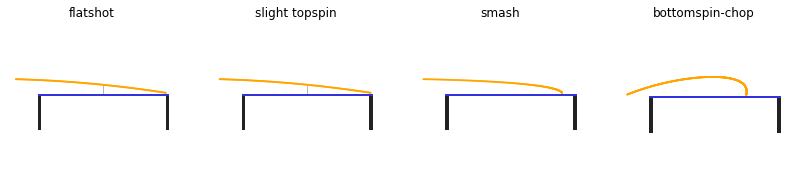

In [4]:
shots = {
    "flatshot": {
        "init_pos": np.array([-1.5, -1., 1.]),
        "init_vel": np.array([35., 5., -1.]),
        "init_rot" : np.array([0., 0., 0.])
    },
    "slight topspin": {
        "init_pos": np.array([-1.5, -1., 1.]),
        "init_vel": np.array([35., 5., -1.]),
        "init_rot" : np.array([0., 0., 1.])
    },
    "smash": {
        "init_pos": np.array([-1.5, -1., 1.]),
        "init_vel": np.array([50., 5., -1.]),
        "init_rot" : np.array([0., 0., -7.])
    },
    "bottomspin-chop": {
        "init_pos": np.array([-1.5, -1., 0.1]),
        "init_vel": np.array([15., 4., 6.]),
        "init_rot" : np.array([0., 0., 3.5])
    }

}

fig,ax= plt.subplots(1, len(shots), figsize=(14,3))
for i,shot in enumerate(shots):
    traj = play_ball(**shots[shot])
    plot_trajectory(ax[i], traj, 'orange', title=shot)